# Коэффициент восстановления золота

*Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.*

*Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки.*

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

*Необходимо:*
* Подготовить данные;
* Провести исследовательский анализ данных;
* Построить и обучить модель.


## Загрузка и подготовка данных




In [ ]:
# импорт библиотек
!pip install missingno
import missingno as msno
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
import math
from statistics import mean

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

import seaborn as sns
import matplotlib.pyplot as plt
from numpy.core.fromnumeric import size
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# просмотр, где находится каталог с файлами на COLAB
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# получение доступа к каталогу и уточнение названия папок
import os
os.listdir('/content/drive/My Drive/Colab Notebooks/Яндекс/Сборный проект 2')

['GitHub',
 'gold_recovery_train_new.csv',
 'gold_recovery_test_new.csv',
 'gold_recovery_full_new.csv',
 'Коэффициент восстановления золота.ipynb',
 'ПРАВКА']

In [ ]:
# присвоить переменной путь к файлу в каталоге
path_0 = "/content/drive/My Drive/Colab Notebooks/Яндекс/Сборный проект 2/gold_recovery_full_new.csv"

In [ ]:
# присвоить переменной путь к файлу в каталоге
path_1 = "/content/drive/My Drive/Colab Notebooks/Яндекс/Сборный проект 2/gold_recovery_train_new.csv"

In [ ]:
# присвоить переменной путь к файлу в каталоге
path_2 = "/content/drive/My Drive/Colab Notebooks/Яндекс/Сборный проект 2/gold_recovery_test_new.csv"

In [ ]:
# считать данные csv и присвоить им имя
data_0 = pd.read_csv(path_0)
data_1 = pd.read_csv(path_1)
data_2 = pd.read_csv(path_2)

In [ ]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [ ]:
data_0.isna().mean().sum()*100

23.051597304388082

In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [ ]:
data_1.isna().mean().sum()*100

28.97731288430278

In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [ ]:
data_2.isna().mean().sum()*100

1.7013232514177696

In [ ]:
# подсчет доли дубликатов
print(data_0.duplicated().sum() / len(data_0) * 100)
print(data_1.duplicated().sum() / len(data_1) * 100)
print(data_2.duplicated().sum() / len(data_2) * 100)

0.0
0.0
0.0


**Наименование столбцов (признаков) исходного датафрейма (full) в части столбцов входящих в тренировочный датасет**
1. date - год, месяц, день и часы, минуты, секунды
_______________________________________________________________________________
2. primary_cleaner.input.sulfate - первичная очистка сырья сульфатами
3. primary_cleaner.input.depressant - первичная очистка сырья силикатом натрия
4. primary_cleaner.input.xanthate - первичная очистка сырья ксантогенатом
5. primary_cleaner.input.feed_size - размер гранул сырья при первичной очистке
_______________________________________________________________________________
6. primary_cleaner.state.floatbank8_a_air - объём воздуха в флотационной установке 8 "a" при первичной очистке
7. primary_cleaner.state.floatbank8_a_level - уровень жидкости в флотационной установке 8 "a" при первичной очистке
8. primary_cleaner.state.floatbank8_b_air - объём воздуха в флотационной установке 8 "b" при первичной очистке
9. primary_cleaner.state.floatbank8_b_level - уровень жидкости в флотационной установке 8 "b" при первичной очистке
10. primary_cleaner.state.floatbank8_c_air - объём воздуха в флотационной установке 8 "c" при первичной очистке
11. primary_cleaner.state.floatbank8_c_level - уровень жидкости в флотационной установке 8 "c" при первичной очистке
12. primary_cleaner.state.floatbank8_d_air - объём воздуха в флотационной установке 8 "d" при первичной очистке
13. primary_cleaner.state.floatbank8_d_level - уровень жидкости в флотационной установке 8 "d" при первичной очистке
_______________________________________________________________________________
14. rougher.input.feed_ag - доля серебра в сырье до флотации
15. rougher.input.feed_pb - доля свинца в сырье до флотации
16. rougher.input.feed_rate - скорость подачи сырья при флотация
17. rougher.input.feed_size - размер гранул сырья при флотация
18. rougher.input.feed_sol - доля солей в сырье до флотации
19. rougher.input.feed_au - доля золота в сырье до флотации _______________________________________________________________________________
20. rougher.input.floatbank10_sulfate - сульфид натрия в флотационной установке 10
21. rougher.input.floatbank10_xanthate - ксантогенат в флотационной установке 10
22. rougher.input.floatbank11_sulfate - сульфид натрия в флотационной установке 11
23. rougher.input.floatbank11_xanthate - ксантогенат в флотационной установке 11
_______________________________________________________________________________
24. rougher.state.floatbank10_a_air - объём воздуха в флотационной установке 10 "a" при первичной очистке
25. rougher.state.floatbank10_a_level - уровень жидкости в флотационной установке 10 "a" при первичной очистке
26. rougher.state.floatbank10_b_air - объём воздуха в флотационной установке 10 "b" при флотации
27. rougher.state.floatbank10_b_level - уровень жидкости в флотационной установке 10 "b" при флотации
28. rougher.state.floatbank10_c_air - объём воздуха в флотационной установке 10 "c" при флотации
29. rougher.state.floatbank10_c_level - уровень жидкости в флотационной установке 10 "c" при флотации
30. rougher.state.floatbank10_d_air - объём воздуха в флотационной установке 10 "d" при флотации
31. rougher.state.floatbank10_d_level - уровень жидкости в флотационной установке 10 "d" при флотации
32. rougher.state.floatbank10_e_air - объём воздуха в флотационной установке 10 "e" при флотации
33. rougher.state.floatbank10_e_level - уровень жидкости в флотационной установке 10 "e" при флотации
34. rougher.state.floatbank10_f_air - объём воздуха в флотационной установке 10 "f" при флотации
35. rougher.state.floatbank10_f_level - уровень жидкости в флотационной установке 10 "f" при флотации
_______________________________________________________________________________
36. secondary_cleaner.state.floatbank2_a_air - объём воздуха в флотационной установке 2 "a" при вторичной очистке
37. secondary_cleaner.state.floatbank2_a_level - уровень жидкости в флотационной установке 2 "a" при вторичной очистке
38. secondary_cleaner.state.floatbank2_b_air - объём воздуха в флотационной установке 2 "b" при вторичной очистке
39. secondary_cleaner.state.floatbank2_b_level - уровень жидкости в флотационной установке 2 "b" при вторичной очистке
40. secondary_cleaner.state.floatbank3_a_air - объём воздуха в флотационной установке 3 "a" при вторичной очистке
41. secondary_cleaner.state.floatbank3_a_level - уровень жидкости в флотационной установке 3 "a" при вторичной очистке
42. secondary_cleaner.state.floatbank3_b_air - объём воздуха в флотационной установке 3 "b" при вторичной очистке
43. secondary_cleaner.state.floatbank3_b_level - уровень жидкости в флотационной установке 3 "b" при вторичной очистке
44. secondary_cleaner.state.floatbank4_a_air - объём воздуха в флотационной установке 4 "a" при вторичной очистке
45. secondary_cleaner.state.floatbank4_a_level - уровень жидкости в флотационной установке 4 "a" при вторичной очистке
46. secondary_cleaner.state.floatbank4_b_air - объём воздуха в флотационной установке 4 "b" при вторичной очистке
47. secondary_cleaner.state.floatbank4_b_level - уровень жидкости в флотационной установке 4 "b" при вторичной очистке
48. secondary_cleaner.state.floatbank5_a_air - объём воздуха в флотационной установке 5 "a" при вторичной очистке
49. secondary_cleaner.state.floatbank5_a_level - уровень жидкости в флотационной установке 5 "a" при вторичной очистке
50. secondary_cleaner.state.floatbank5_b_air - объём воздуха в флотационной установке 5 "b" при вторичной очистке
51. secondary_cleaner.state.floatbank5_b_level - уровень жидкости в флотационной установке 5 "b" при вторичной очистке
52. secondary_cleaner.state.floatbank6_a_air - объём воздуха в флотационной установке 6 "a" при вторичной очистке
53. secondary_cleaner.state.floatbank6_a_level - уровень жидкости в флотационной установке 6 "a" при вторичной очистке
_______________________________________________________________________________
**Наименование столбцов (признаков) исходного датафрейма (full) в части столбцов не входящих в тренировочный датасет**
1. final.output.concentrate_ag - финальная доля серебра в концентрате
2. final.output.concentrate_pb - финальная доля свинца в концентрате
3. final.output.concentrate_sol - финальная доля солей в концентрате
4. final.output.concentrate_au - финальная доля золота в концентрате
5. final.output.recovery - эффективность обогащения финального концентрата 
6. final.output.tail_ag - финальная доля серебра в хвостах
7. final.output.tail_pb - финальная доля свинца в хвостах
8. final.output.tail_sol - финальная доля солей в хвостах
9. final.output.tail_au - финальная доля золота в хвостах
_______________________________________________________________________________
10. primary_cleaner.output.concentrate_ag - доля серебра в концентрате после первичной очистки
11. primary_cleaner.output.concentrate_pb - доля свинца в концентрате после первичной очистки
12. primary_cleaner.output.concentrate_sol - доля солей в концентрате после первичной очистки
13. primary_cleaner.output.concentrate_au - доля золота в концентрате после первичной очистки
14. primary_cleaner.output.tail_ag - доля серебра в хвостах после первичной очистки
15. primary_cleaner.output.tail_pb - доля свица в хвостах после первичной очистки
16. primary_cleaner.output.tail_sol - доля солей в хвостах после первичной очистки
17. primary_cleaner.output.tail_au - доля золота в хвостах после первичной очистки
_______________________________________________________________________________
18. rougher.calculation.sulfate_to_au_concentrate - расчет сульфида натрия для концентрата золота при флотации
19. rougher.calculation.floatbank10_sulfate_to_au_feed - расчет сульфида натрия для сырья золота в флотационной установке 10
20. rougher.calculation.floatbank11_sulfate_to_au_feed - расчет сульфида натрия для сырья золота в флотационной установке 11
21. rougher.calculation.au_pb_ratio - расчет скорости подачи золота и свинца при флотации
_______________________________________________________________________________
22. rougher.output.concentrate_ag - доля серебра в концентрате после флотации
23. rougher.output.concentrate_pb - доля свинца в концентрате после флотации
24. rougher.output.concentrate_sol - доля солей в концентрате после флотации
25. rougher.output.concentrate_au - доля золота в концентрате после флотации
_______________________________________________________________________________
26. rougher.output.recovery - эффективность обогащения чернового концентрата
27. rougher.output.tail_ag - доля серебра в хвостах  после флотации
28. rougher.output.tail_pb - доля свинца в хвостах  после флотации
29. rougher.output.tail_sol - доля солей в хвостах  после флотации
30. rougher.output.tail_au - доля золота в хвостах  после флотации
_______________________________________________________________________________
31. secondary_cleaner.output.tail_ag - доля серебра в хвостах после вторичной очистки
32. secondary_cleaner.output.tail_pb - доля свинца в хвостах после вторичной очистки
33. secondary_cleaner.output.tail_sol - доля солей в хвостах после вторичной очистки  
34. secondary_cleaner.output.tail_au - доля золота в хвостах после вторичной очистки  

### Вывод

**На этапе предобработки установлено:**
1. Доля пропусков в исходном датафрейме (full) порядка 23% - это очень много.
2. Доля пропусков в тренировочном датафрейме (train) порядка 29% - это очень много.
3. Доля пропусков в тестовом датафрейме (test) порядка 2%
4. Явные дубликаты в данных отсутствуют.

### Проверка верности расчета эффективности обогащения  чернового концентрата

In [ ]:
F = data_0["rougher.input.feed_au"] # доля золота в сырье
C = data_0["rougher.output.concentrate_au"] # доля золота в концентрате
T = data_0["rougher.output.tail_au"] # доля золота в хвостах

Перед проведением расчетов еще раз убедимся в отсутствии пропусков в столбцах

In [ ]:
F.isna().sum()

0

In [ ]:
C.isna().sum()


0

In [ ]:
T.isna().sum()

0

In [ ]:
recovery = (C *(F - T)) / (F *(C - T)) * 100

In [ ]:
recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
19434    89.574376
19435    87.724007
19436    88.890579
19437    89.858126
19438    89.514960
Length: 19439, dtype: float64

In [ ]:
recovery_data_0 = data_0['rougher.output.recovery']
recovery_data_0

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
19434    89.574376
19435    87.724007
19436    88.890579
19437    89.858126
19438    89.514960
Name: rougher.output.recovery, Length: 19439, dtype: float64

In [ ]:
print("MAE =",mean_absolute_error(recovery_data_0, recovery))

MAE = 9.874045668302637e-15


### Вывод

**Расчет эффективности обогащения чернового концентрата выполнен корректно**

In [ ]:
target = data_0[['rougher.output.recovery', 'final.output.recovery']]

In [ ]:
target.isna().mean().sum()

0.0

In [ ]:
target.sort_values(by='rougher.output.recovery', ascending=False)

,rougher.output.recovery,final.output.recovery
16227,100.0,100.000000
16230,100.0,100.000000
16226,100.0,100.000000
16229,100.0,100.000000
16228,100.0,100.000000
...,...,...
15120,0.0,57.634579
4776,0.0,37.231322
4775,0.0,54.324899
4773,0.0,54.910086


In [ ]:
target.sort_values(by='final.output.recovery', ascending=False)

,rougher.output.recovery,final.output.recovery
14740,65.196111,100.0
11929,83.406924,100.0
8843,87.624925,100.0
8842,88.832417,100.0
8841,89.680290,100.0
...,...,...
14734,77.103878,0.0
14733,75.499299,0.0
7587,83.489926,0.0
7586,80.886673,0.0


### Вывод

**Выявлены следующие аномалии:**

1. В столбцах с целевыми признаками имеются значения концентрации 100 %.
2. В столбцах с целевыми признаками имеются значения концентрации 0 %.

### Устранение пропусков и аномалий

In [ ]:
# функция замены пропусков
def change_nan(data_colum, num):
  for i in range(len(data_colum)):
    if data_colum[i] == num:
      data_colum[i] = data_colum[i - 1] 

In [ ]:
# функция проверки наличия числа в столбцах 
def check_num_in_data(data, list_colums, num):
  count = 0
  num = num
  for colum in list_colums:
    if num in data[colum]:
      count = count + 1
  if count == 0:
    print("Число", num, "не встречается в столбцах")
    print("Число", num, "подходит для применения в функции fillna()")
  else:
    print("Число", num, "встречается в столбцах")
    print("Подберите другое число для применения в функции fillna()")   
      

*Так как, этапы технологического процесса связаны и идут друг за другом, то заполнение пропусков средними значениями не корректно. Наиболее рациональным будет заполнение пропусков данными из предыдущих строк.*

**Таким образом, предлагается устранить пропуски и аномалии. После чего, исходя из индексов целевых признаков, сформировать тестовый датафрейм и тренировочный.**

### Устранение пропусков в data_0

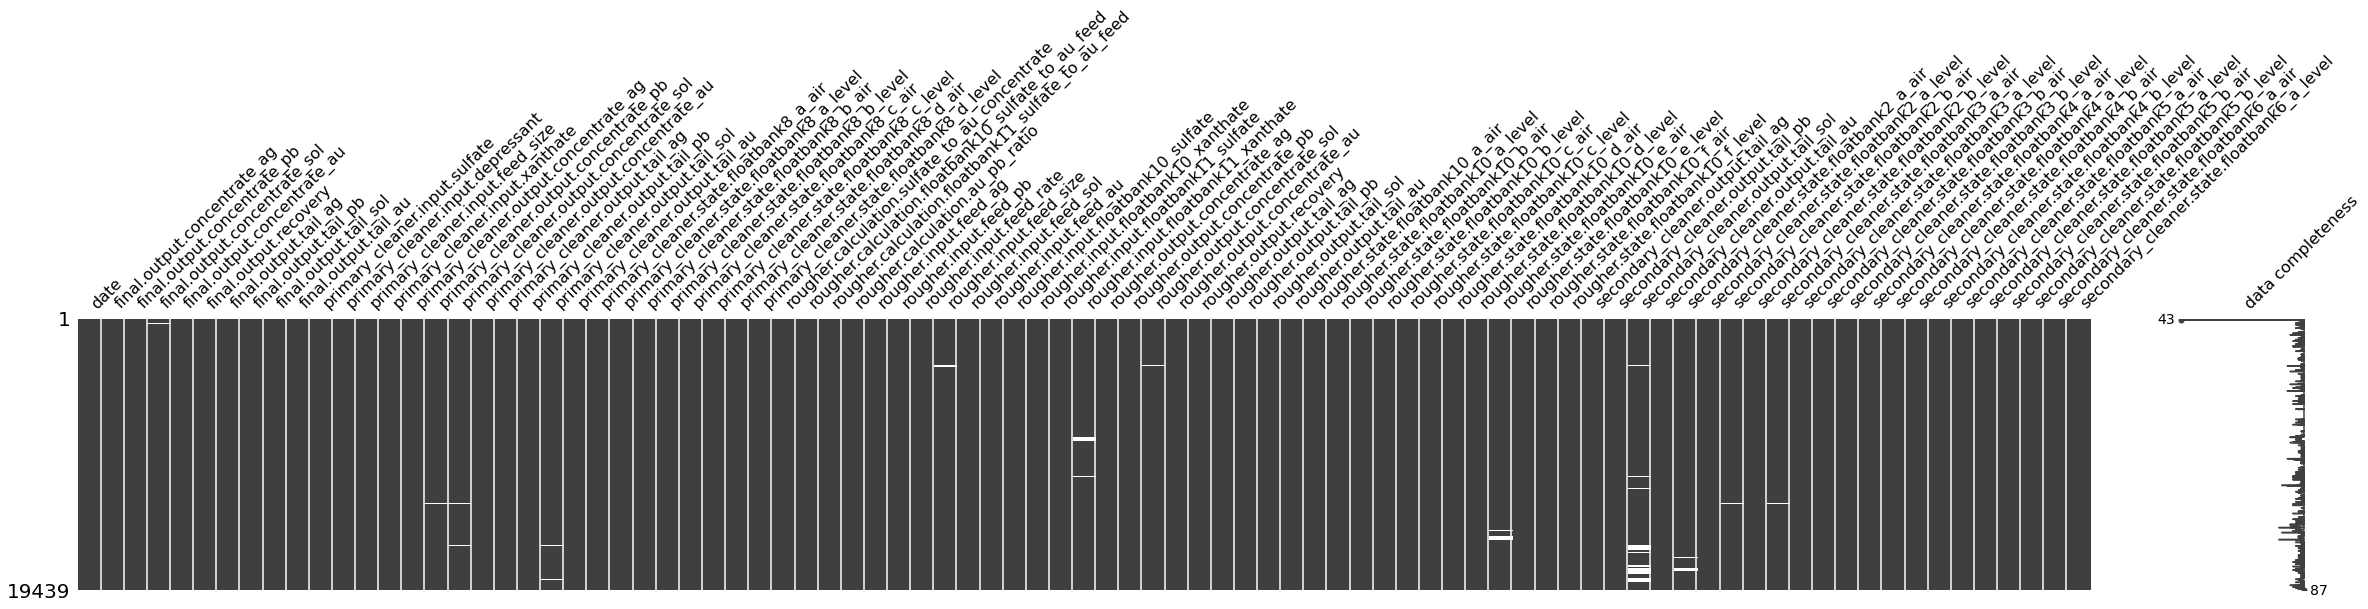

In [ ]:
msno.matrix(data_0, labels=True, figsize=(40, 5));

In [ ]:
check_num_in_data(data_0, data_0.columns, -1)

Число -1 не встречается в столбцах
Число -1 подходит для применения в функции fillna()


In [ ]:
data_1[data_0.columns] = data_1[data_0.columns].fillna(-1)

In [ ]:
for colum in data_0.columns:
  change_nan(data_0[colum], -1)

In [ ]:
data_1.isna().mean().sum()*100

0.0

In [ ]:
data_0.shape

(19439, 87)

### Устранение пропусков в data_1

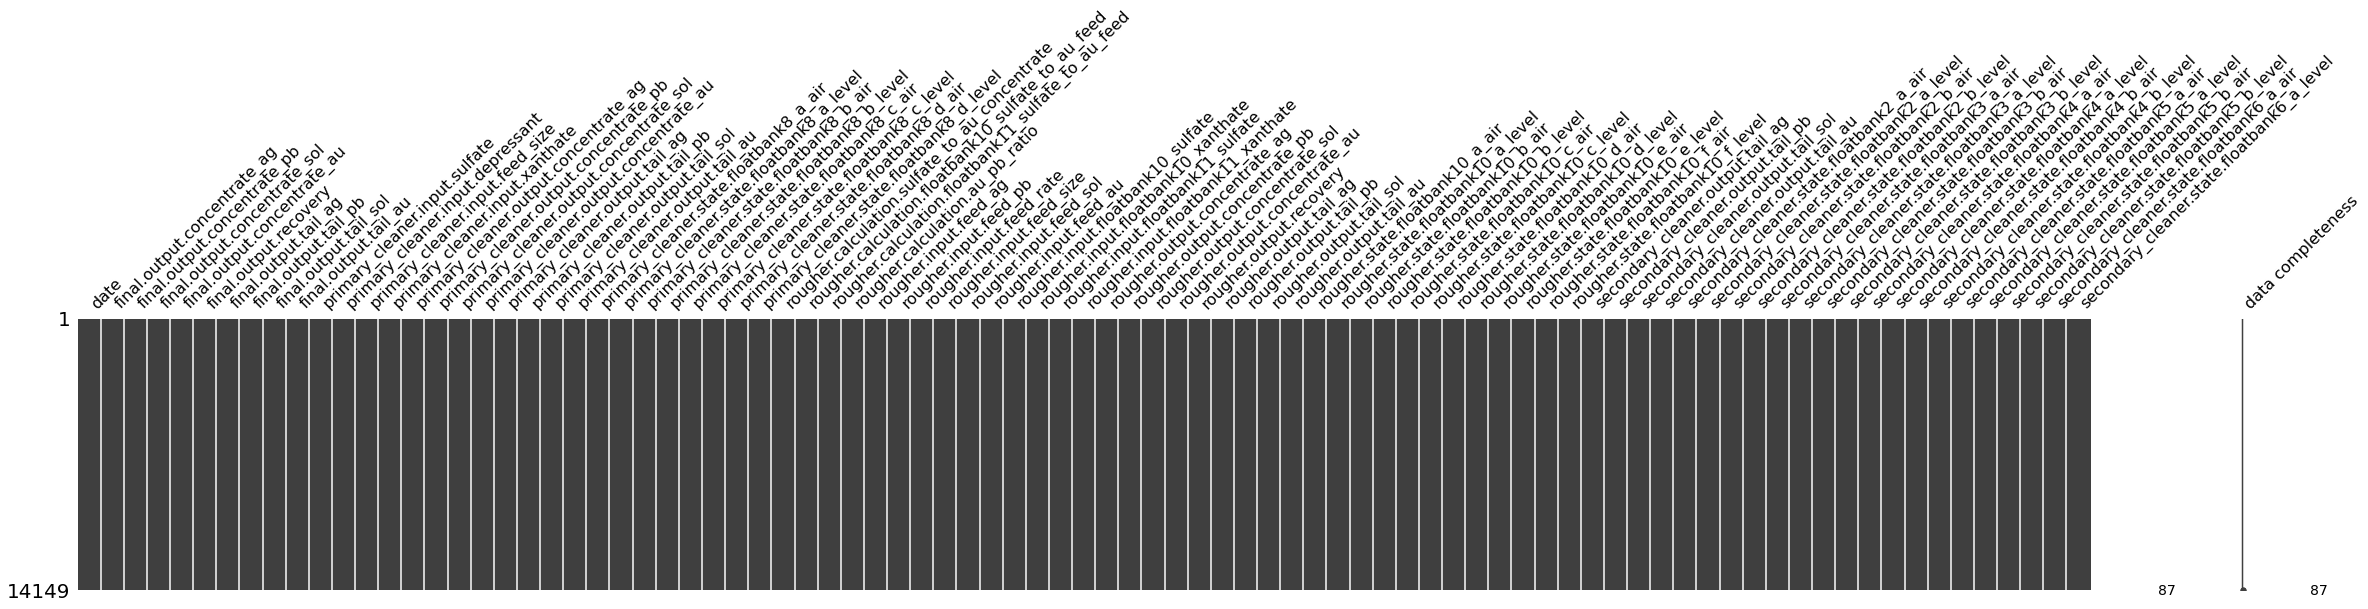

In [ ]:
msno.matrix(data_1, labels=True, figsize=(40, 5));

In [ ]:
check_num_in_data(data_1, data_1.columns, -1)

Число -1 не встречается в столбцах
Число -1 подходит для применения в функции fillna()


In [ ]:
data_1[data_1.columns] = data_1[data_1.columns].fillna(-1)

In [ ]:
for colum in data_1.columns:
  change_nan(data_1[colum], -1)

In [ ]:
data_1.isna().mean().sum()*100

0.0

In [ ]:
data_1.shape

(14149, 87)

### Устранение пропусков в data_2

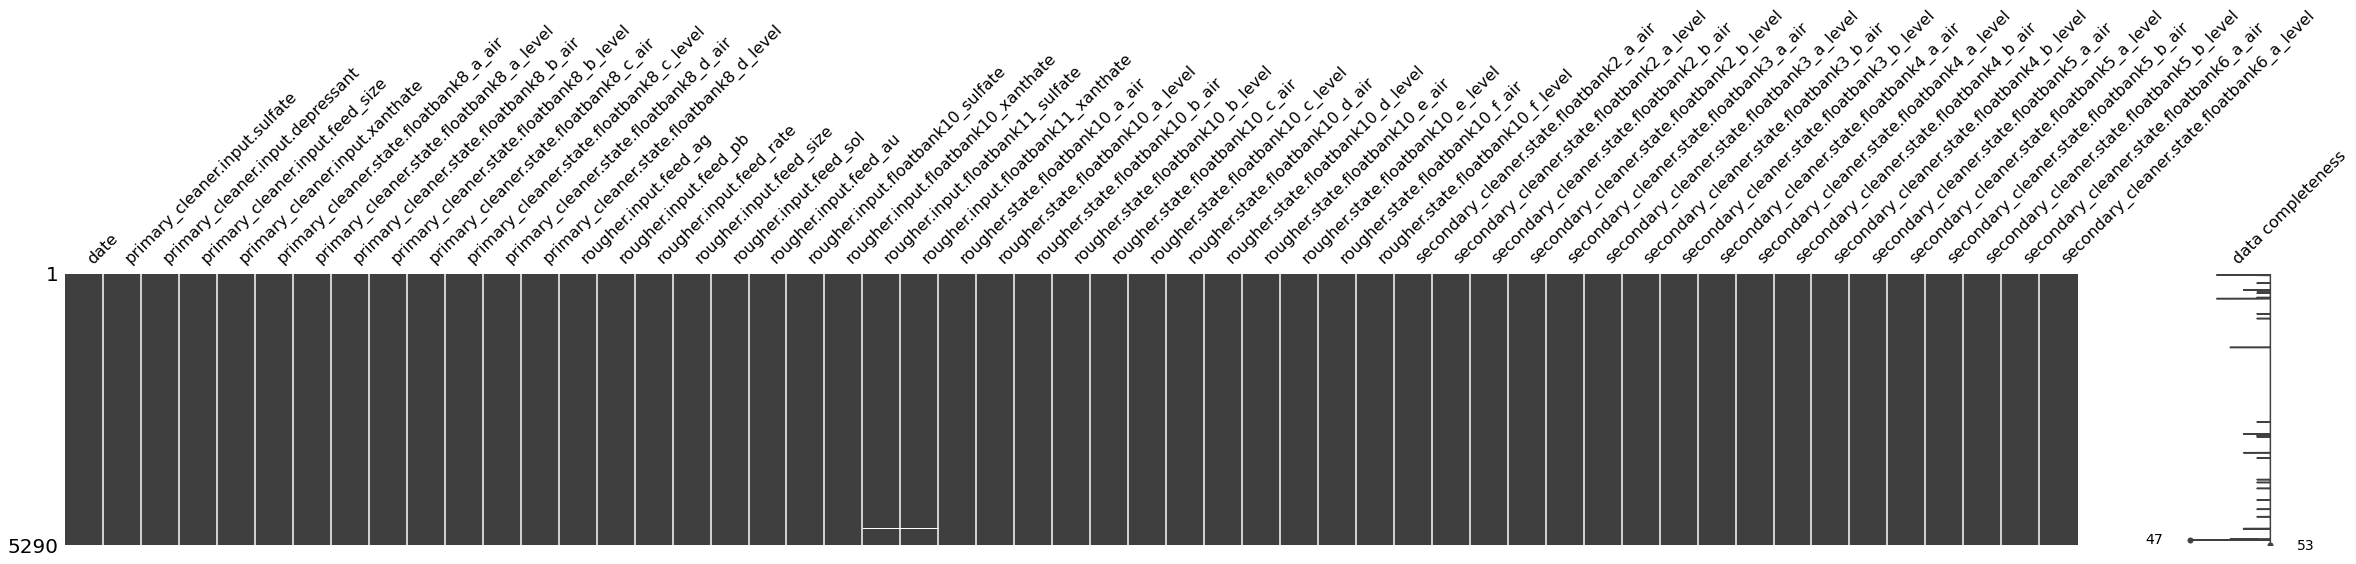

In [ ]:
msno.matrix(data_2, labels=True, figsize=(40, 5));

In [ ]:
check_num_in_data(data_2, data_2.columns, -1)

Число -1 не встречается в столбцах
Число -1 подходит для применения в функции fillna()


In [ ]:
data_2[data_2.columns] = data_2[data_2.columns].fillna(-1)

In [ ]:
for colum in data_2.columns:
  change_nan(data_2[colum], -1)

In [ ]:
data_1.isna().mean().sum()*100

0.0

In [ ]:
data_2.shape

(5290, 53)

### Устранение аномалий

In [ ]:
target = target[(target['rougher.output.recovery'] != 100) & (target['rougher.output.recovery'] != 0)]
target = target[(target['final.output.recovery'] != 100) & (target['final.output.recovery'] != 0)]

In [ ]:
target.sort_values(by='rougher.output.recovery', ascending=False)

,rougher.output.recovery,final.output.recovery
18534,99.979041,72.744645
16830,99.847663,82.128174
8757,99.772958,68.867133
19248,99.617781,77.943676
16967,99.430390,77.874466
...,...,...
13780,20.691275,75.966464
7218,18.491446,5.586496
5939,10.430587,51.772807
2344,9.826876,45.586191


In [ ]:
features_test = data_2
features_test = features_test.drop(columns=['date'])
target_test = target.iloc[features_test.index]

In [ ]:
target_test.shape

(5290, 2)

In [ ]:
features_test.shape

(5290, 52)

In [ ]:
features = data_1
features = features[features_test.columns]
target = target.iloc[features.index]

In [ ]:
target.shape

(14149, 2)

In [ ]:
features.shape

(14149, 52)

### Общий вывод по этапу подготовки данных

**На этапе предобработки, установлено:**
1. Доля пропусков в исходном датафрейме (full) порядка 23% - это очень много.
2. Доля пропусков в тренировочном датафрейме (train) порядка 29% - это очень много.
3. Доля пропусков в тестовом датафрейме (test) порядка 2%
4. Явные дубликаты в данных отсутствуют.

**Расчет эффективности обогащения чернового концентрата выполнен корректно**

**Выявлены следующие аномалии:**

1. В столбцах с целевыми признаками имеются значения концентрации 100 %.
2. В столбцах с целевыми признаками имеются значения концентрации 0 %.

**Устранены пропуски и аномалии.**

## Анализ данных

### Анализ концентрации металлов (Au, Ag, Pb) на различных этапах очистки

In [ ]:
new_data_0 = data_0

In [ ]:
#print("До флотации           золото                серебро                 свинец")
new_data_0[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']].describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb
count,19439.000000,19439.000000,19339.000000
mean,8.266097,8.794927,3.598085
std,1.955092,1.936847,1.049486
min,0.010000,0.010000,0.010000
25%,6.854384,7.237967,2.887280
50%,8.125839,8.593574,3.534895
75%,9.769917,10.213771,4.244161
max,13.731330,14.596026,7.142594


In [ ]:
#print("После флотации                золото                        серебро                         свинец")
new_data_0[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_ag']].describe()

,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_ag
count,19439.000000,19439.000000,19439.000000
mean,19.772000,11.994759,11.994759
std,3.753600,2.733862,2.733862
min,0.000000,0.000000,0.000000
25%,18.802523,10.628337,10.628337
50%,20.280214,12.098115,12.098115
75%,21.717843,13.736996,13.736996
max,28.824507,24.480271,24.480271


In [ ]:
#print("После первичной очистки               золото                                серебро                                 свинец")
new_data_0[['primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb']].describe()

,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb
count,19439.000000,19439.000000,19323.000000
mean,32.119400,8.442408,9.829530
std,5.627611,2.054465,2.556843
min,0.000000,0.000000,0.000000
25%,30.463140,7.263288,8.702328
50%,32.841295,8.507298,10.152433
75%,35.048006,9.809001,11.424971
max,45.933934,16.081632,17.081278


In [ ]:
#print("После вторичной очистки     золото                      серебро                       свинец")
new_data_0[['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb']].describe()

,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb
count,19439.000000,19438.000000,19438.000000
mean,44.076513,5.168470,9.978895
std,5.129784,1.372348,1.669240
min,0.000000,0.000000,0.000000
25%,43.402215,4.251240,9.137262
50%,45.011244,5.066094,10.102433
75%,46.275313,5.895527,11.035769
max,52.756638,16.001945,17.031899


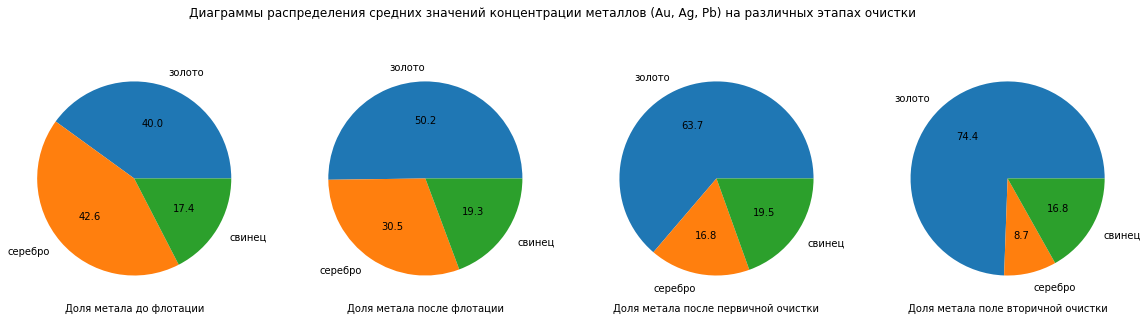

In [ ]:
plt.rcParams["figure.figsize"] = (20,5)
plt.suptitle('Диаграммы распределения средних значений концентрации металлов (Au, Ag, Pb) на различных этапах очистки')
plt.subplot(1, 4, 1)
names='золото', 'серебро', 'свинец',
values=[new_data_0["rougher.input.feed_au"].mean(),
        new_data_0["rougher.input.feed_ag"].mean(),
        new_data_0["rougher.input.feed_pb"].mean()]
plt.pie(values, labels=names, labeldistance=1.15, autopct='%.1f');
plt.xlabel("Доля метала до флотации")

plt.subplot(1, 4, 2)
names='золото', 'серебро', 'свинец',
values=[new_data_0["rougher.output.concentrate_au"].mean(),
        new_data_0["rougher.output.concentrate_ag"].mean(),
        new_data_0["rougher.output.concentrate_pb"].mean()]
plt.pie(values, labels=names, labeldistance=1.15, autopct='%.1f');
plt.xlabel("Доля метала после флотации")

plt.subplot(1, 4, 3)
names='золото', 'серебро', 'свинец',
values=[new_data_0["primary_cleaner.output.concentrate_au"].mean(),
        new_data_0["primary_cleaner.output.concentrate_ag"].mean(),
        new_data_0["primary_cleaner.output.concentrate_pb"].mean()]
plt.pie(values, labels=names, labeldistance=1.15, autopct='%.1f');
plt.xlabel("Доля метала после первичной очистки")

plt.subplot(1, 4, 4)
names='золото', 'серебро', 'свинец',
values=[new_data_0["final.output.concentrate_au"].mean(),
        new_data_0["final.output.concentrate_ag"].mean(),
        new_data_0["final.output.concentrate_pb"].mean()]
plt.pie(values, labels=names, labeldistance=1.15, autopct='%.1f');
plt.xlabel("Доля метала поле вторичной очистки")

plt.show();

### Вывод

**Анализ концентрации металлов (Au, Ag, Pb) на различных этапах очистки, показывает:**

1. Концентрация серебра в финальном концентрате на 40,9 % меньше чем в исходном сырье.
2. Концентрация свинца в финальном концентрате на 177,8 % больше чем в исходном сырье.
2. Концентрация золота в финальном концентрате на 431,3 % больше чем в исходном сырье.
3. Диаграммы распределения средних значений концентрации металлов (Au, Ag, Pb) на различных этапах очистки, отражают увеличение доли золота по мере очистки, при этом доля серебра уменьшается, а доля свинца остается относительно постоянной.

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

In [ ]:
print("Для обучающей выборки:")
print("MIN =", round(features["rougher.input.feed_size"].min(), 1))
print("MAX =", round(features["rougher.input.feed_size"].max(), 1))
print("Среднее значение =", round(features["rougher.input.feed_size"].mean(), 1))
print("Медианное значение =", round(features["rougher.input.feed_size"].median(), 1))
print()
print("Для тестовой выборки:")
print("MIN =", round(features_test["rougher.input.feed_size"].min(), 1))
print("MAX =", round(features_test["rougher.input.feed_size"].max(), 1))
print("Среднее значение =", round(features_test["rougher.input.feed_size"].mean(), 1))
print("Медианное значение =", round(features_test["rougher.input.feed_size"].median(), 1))

Для обучающей выборки:
MIN = 9.7
MAX = 485.0
Среднее значение = 60.2
Медианное значение = 55.3

Для тестовой выборки:
MIN = 0.0
MAX = 392.5
Среднее значение = 56.0
Медианное значение = 50.8


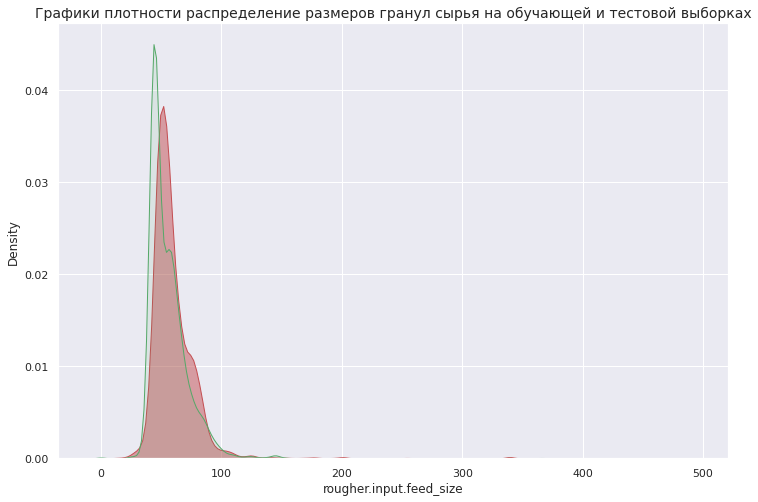

In [ ]:
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"]=12,8

plt.title("Графики плотности распределение размеров гранул сырья на обучающей и тестовой выборках", size=14)
fig = sns.kdeplot(features["rougher.input.feed_size"], shade=True, color="r", alpha=0.5)
fig = sns.kdeplot(features_test["rougher.input.feed_size"], shade=True, color="g", alpha=0.1)
plt.show()

### Вывод

**Анализ распределения размеров гранул сырья на обучающей и тестовой выборках, показал:**

1. Средние значения различаются на 7.5 %.
2. Медианные значения различаются на 8.9 %.
3. Графики распределения плотности размеров гранул сырья на обучающей и тестовой выборках не сильно отличаются друг от друга.

In [ ]:
print("До флотации")
print("Суммарная концентрация  золота:{: 0.2f}*10^5, серебра:{: 0.2f}*10^5, свинца:{: 0.2f}*10^5".
format(new_data_0["rougher.input.feed_au"].sum() / 10**5,
new_data_0["rougher.input.feed_ag"].sum() / 10**5,
new_data_0["rougher.input.feed_pb"].sum() / 10**5))
print()
print("После флотации")
print("Суммарная концентрация золота:{: 0.2f}*10^5, серебра:{: 0.2f}*10^5, свинца:{: 0.2f}*10^5".
format(new_data_0["rougher.output.concentrate_au"].sum() / 10**5,
new_data_0["rougher.output.concentrate_ag"].sum() / 10**5,
new_data_0["rougher.output.concentrate_pb"].sum() / 10**5))
print()
print("После первичной очистки")
print("Суммарная концентрация золота:{: 0.2f}*10^5, серебра:{: 0.2f}*10^5, свинца:{: 0.2f}*10^5".
format(new_data_0["primary_cleaner.output.concentrate_au"].sum() / 10**5,
new_data_0["primary_cleaner.output.concentrate_ag"].sum() / 10**5,
new_data_0["primary_cleaner.output.concentrate_pb"].sum() / 10**5))
print()
print("Поcле вторичной очистки")
print("Суммарная концентрация золота:{: 0.2f}*10^5, серебра:{: 0.2f}*10^5, свинца:{: 0.2f}*10^5".
format(new_data_0["final.output.concentrate_au"].sum() / 10**5,
new_data_0["final.output.concentrate_ag"].sum() / 10**5,
new_data_0["final.output.concentrate_pb"].sum() / 10**5))

До флотации
Суммарная концентрация  золота: 1.61*10^5, серебра: 1.71*10^5, свинца: 0.70*10^5

После флотации
Суммарная концентрация золота: 3.84*10^5, серебра: 2.33*10^5, свинца: 1.48*10^5

После первичной очистки
Суммарная концентрация золота: 6.24*10^5, серебра: 1.64*10^5, свинца: 1.90*10^5

Поcле вторичной очистки
Суммарная концентрация золота: 8.57*10^5, серебра: 1.00*10^5, свинца: 1.94*10^5


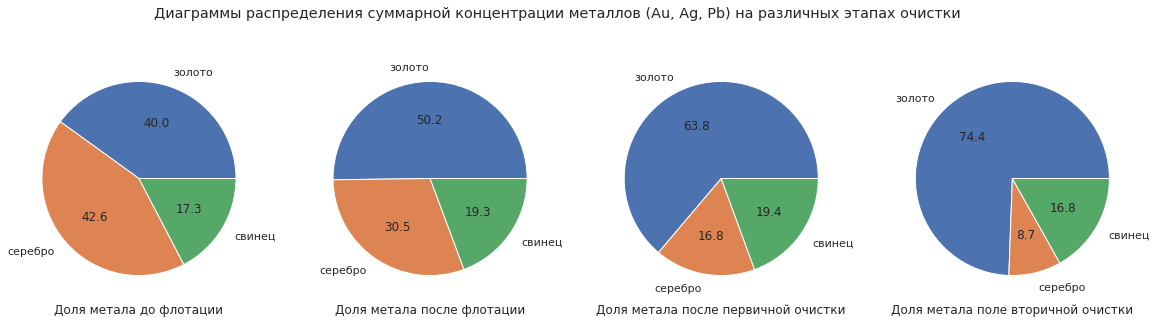

In [ ]:
plt.rcParams["figure.figsize"] = (20,5)
plt.suptitle('Диаграммы распределения суммарной концентрации металлов (Au, Ag, Pb) на различных этапах очистки')
plt.subplot(1, 4, 1)
names='золото', 'серебро', 'свинец',
values=[new_data_0["rougher.input.feed_au"].sum() / 10**5,
        new_data_0["rougher.input.feed_ag"].sum() / 10**5,
        new_data_0["rougher.input.feed_pb"].sum() / 10**5]
plt.pie(values, labels=names, labeldistance=1.15, autopct='%.1f');
plt.xlabel("Доля метала до флотации")

plt.subplot(1, 4, 2)
names='золото', 'серебро', 'свинец',
values=[new_data_0["rougher.output.concentrate_au"].sum() / 10**5,
        new_data_0["rougher.output.concentrate_ag"].sum() / 10**5,
        new_data_0["rougher.output.concentrate_pb"].sum() / 10**5]
plt.pie(values, labels=names, labeldistance=1.15, autopct='%.1f');
plt.xlabel("Доля метала после флотации")

plt.subplot(1, 4, 3)
names='золото', 'серебро', 'свинец',
values=[new_data_0["primary_cleaner.output.concentrate_au"].sum() / 10**5,
        new_data_0["primary_cleaner.output.concentrate_ag"].sum() / 10**5,
        new_data_0["primary_cleaner.output.concentrate_pb"].sum() / 10**5]
plt.pie(values, labels=names, labeldistance=1.15, autopct='%.1f');
plt.xlabel("Доля метала после первичной очистки")

plt.subplot(1, 4, 4)
names='золото', 'серебро', 'свинец',
values=[new_data_0["final.output.concentrate_au"].sum() / 10**5,
        new_data_0["final.output.concentrate_ag"].sum() / 10**5,
        new_data_0["final.output.concentrate_pb"].sum() / 10**5]
plt.pie(values, labels=names, labeldistance=1.15, autopct='%.1f');
plt.xlabel("Доля метала поле вторичной очистки")

plt.show();


### Вывод

**Анализ суммарной концентрации металлов (Au, Ag, Pb) на различных этапах очистки, показывает:**

1. Суммарная концентрация серебра в финальном концентрате на 41,5 % меньше чем в исходном сырье.
2. Суммарная концентрация свинца в финальном концентрате на 177,1 % больше чем в исходном сырье.
3. Суммарная концентрация золота в финальном концентрате на 432,3 % больше чем в исходном сырье.
4. Диаграммы распределения суммарной концентрации металлов (Au, Ag, Pb) на различных этапах очистки, отражают увеличение доли золота по мере очистки, при этом доля серебра уменьшается, а доля свинца остается относительно постоянной.

## Модель

### Функция для вычисления итоговой sMAPE

In [ ]:
def sMAPE(y_true,y_pred):
    error = np.mean(abs(y_true - y_pred)/((abs(y_true)+abs(y_pred))/2))*100
    return error

In [ ]:
def final_sMAPE(sMAPE_rougher,sMAPE_final):
    return (0.25*sMAPE_rougher + 0.75*sMAPE_final)

In [ ]:
def mape(y_true, y_pred):
  sMAPE_rougher = sMAPE(y_true["rougher.output.recovery"], y_pred[0])
  sMAPE_final = sMAPE(y_true["final.output.recovery"], y_pred[1])
  return final_sMAPE(sMAPE_rougher,sMAPE_final)
    

### Обучение моделей и оценка их качества кросс-валидацией

In [ ]:
  features = features
  target = target
  # деление данных на обучающую и валидационную выборки в соотношении 73:27
  features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.27, random_state=12345)

In [ ]:
# масштабирование признаков
numeric = features.columns

scaler = StandardScaler()
scaler.fit(features[numeric])
features[numeric] = scaler.transform(features[numeric])

In [ ]:
# функция поиска лучшей модели на кросс-валидации в Python (cv=cv_num)
def search_best_model(list_model, features, target, cv_num):
  best_model = None
  score = 100
  for model in list_model:
    scores = []
    sample_size = int(len(features)/cv_num)
    for i in range(0, len(features), sample_size): 
      valid_indexes = features.iloc[i: i + sample_size].index 
      train_indexes = (features.iloc[:i] + features.iloc[i + sample_size : len(features)]).index

      features_train = features.iloc[train_indexes] 
      features_valid = features.iloc[valid_indexes] 
      target_train = target.iloc[train_indexes] 
      target_valid = target.iloc[valid_indexes] 

      model = model.fit(features_train, target_train)

      y_true = target_valid
      y_pred = pd.DataFrame(model.predict(features_valid))

      fin_sMAPE = mape(y_true, y_pred)
      scores.append(fin_sMAPE)
    scores = pd.Series(scores)
    result = scores.mean()
    if result < score:
      score = result
      best_model = model
  print("Среднее итоговое sMAPE лучшей модели на тестовом датафрейме:", round(score, 2), "%)")
  print("Лучшая модель:", best_model)
  print("Точность предсказания лучшей модели:", 100 - round(score, 2), "%")

### LinearRegression

In [ ]:
# расчет итогового sMAPE для LinearRegression
model = LinearRegression()
model.fit(features_train, target_train)
y_true = target_valid
y_pred = pd.DataFrame(model.predict(features_valid))

result = mape(y_true, y_pred)

print("Модель:", model)
print("Итоговое sMAPE:", round(result, 1))

Модель: LinearRegression()
Итоговое sMAPE: 10.6


In [ ]:
model_LinearRegression = model

### RandomForestRegressor

In [ ]:
# подбор гиперпараметров: глубины дерева, числа деревьев на основе итогового sMAPE
best_model_RandomForestRegressor = None
best_result = 100
for depth in range(1, 5, 1):
  for est in range(1, 5, 1):
    model = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    
    y_true = target_valid
    y_pred = pd.DataFrame(model.predict(features_valid))

    result = mape(y_true, y_pred)
    if result < best_result:
      best_model_RandomForestRegressor = model
      best_result = result

print("Лучшие параметры модели:", best_model_RandomForestRegressor)
print("Итоговое sMAPE:", round(best_result, 1))

Лучшие параметры модели: RandomForestRegressor(max_depth=1, n_estimators=3, random_state=12345)
Итоговое sMAPE: 10.0


### DecisionTreeRegressor

In [ ]:
# подбор гиперпараметров: глубины дерева, минимального числа samples_split на основе итогового sMAPE 
best_model_DecisionTreeRegressor = None
best_result = 100
for depth in range(1, 5, 1):
  for spl in range(2, 6, 1):
    model = DecisionTreeRegressor(max_depth=depth, min_samples_split=spl, random_state=12345)
    model.fit(features_train, target_train)
    
    y_true = target_valid
    y_pred = pd.DataFrame(model.predict(features_valid))

    result = mape(y_true, y_pred)
    if result < best_result:
      best_model_DecisionTreeRegressor = model
      best_result = result

print("Лучшие параметры модели:", best_model_DecisionTreeRegressor)
print("Итоговое sMAPE:", round(best_result, 1))

Лучшие параметры модели: DecisionTreeRegressor(max_depth=1, random_state=12345)
Итоговое sMAPE: 10.0


### Выбор лучшей модели среди лучших

In [ ]:
# лист из претендентов на лучшую модель
list_model = [model_LinearRegression, best_model_RandomForestRegressor, best_model_DecisionTreeRegressor]

In [ ]:
search_best_model(list_model, features_test, target_test, 3)

Среднее итоговое sMAPE лучшей модели на тестовом датафрейме: 10.77 %)
Лучшая модель: DecisionTreeRegressor(max_depth=1, random_state=12345)
Точность предсказания лучшей модели: 89.23 %


### Вывод

**В результате моделирования установлено:**

1. Лучшая модель: DecisionTreeRegressor(max_depth=1, random_state=12345).
2. Среднее итоговое sMAPE лучшей модели на тестовом датафрейме: 10.77 %.
3. Точность предсказания лучшей модели: 89.23 %.


## Общий вывод

**На этапе предобработки установлено:**
1. Доля пропусков в исходном датафрейме (full) порядка 23%.
2. Доля пропусков в тренировочном датафрейме (train) порядка 29%.
3. Доля пропусков в тестовом датафрейме (test) порядка 2%
4. Явные дубликаты в данных отсутствуют.

**Расчет эффективности обогащения чернового концентрата выполнен корректно**

**Выявлены следующие аномалии:**

1. В столбцах с целевыми признаками имеются значения концентрации 100 %.
2. В столбцах с целевыми признаками имеются значения концентрации 0 %.

**В заключении этапа предобработки устранены пропуски и аномалии.**

**Анализ концентрации металлов (Au, Ag, Pb) на различных этапах очистки, показал:**

1. Концентрация серебра в финальном концентрате на 40,9 % меньше чем в исходном сырье.
2. Концентрация свинца в финальном концентрате на 177,8 % больше чем в исходном сырье.
2. Концентрация золота в финальном концентрате на 431,3 % больше чем в исходном сырье.
3. Диаграммы распределения средних значений концентрации металлов (Au, Ag, Pb) на различных этапах очистки, отражают увеличение доли золота по мере очистки, при этом доля серебра уменьшается, а доля свинца остается относительно постоянной.

**Анализ распределения размеров гранул сырья на обучающей и тестовой выборках, показал:**

1. Средние значения различаются на 7.5 %.
2. Медианные значения различаются на 8.9 %.
3. Графики распределения плотности размеров гранул сырья на обучающей и тестовой выборках не сильно отличаются друг от друга.

**Анализ суммарной концентрации металлов (Au, Ag, Pb) на различных этапах очистки, показал:**

1. Суммарная концентрация серебра в финальном концентрате на 41,5 % меньше чем в исходном сырье.
2. Суммарная концентрация свинца в финальном концентрате на 177,1 % больше чем в исходном сырье.
3. Суммарная концентрация золота в финальном концентрате на 432,3 % больше чем в исходном сырье.
4. Диаграммы распределения суммарной концентрации металлов (Au, Ag, Pb) на различных этапах очистки, отражают увеличение доли золота по мере очистки, при этом доля серебра уменьшается, а доля свинца остается относительно постоянной.

**В результате моделирования установлено:**

1. Лучшая модель: DecisionTreeRegressor(max_depth=1, random_state=12345).
2. Среднее итоговое sMAPE лучшей модели на тестовом датафрейме: 10.77 %.
3. Точность предсказания лучшей модели: 89.23 %.